# Accuracy of operations involving floating point numbers

### Example 1: Equality test for two floats

Equality tests involving two floating point numbers can be tricky

Consider $x = 1.1 + 2.2$.

The answer should be $x = 3.3$ but due to round-off error one can only assume $x = 3.3 + \varepsilon_M$ where e.g. $\varepsilon_M \sim 10^{-15}$ is the machine precision for 64-bit floating point numbers.

For this reason an equality test $x == 3.3$ might give some unexpected results...

In [1]:
x = 1.1 + 2.2

print("x = ",x)
print(3.3)

if (x == 3.3):
    print("x == 3.3 is True")
else:
    print("x == 3.3 is False")


x =  3.3000000000000003
3.3
x == 3.3 is False


A safer way to compare two floats is to check the equality only wihtin a certain precision $\varepsilon$

In [2]:
print("x = ",x)

# The desired precision
eps = 1.e-12

# The comparison
if (abs(x-3.3) < eps):
    print("x == 3.3 to a precision of",eps,"is True")
else:
    print("x == 3.3 to a precision of",eps,"is False")

x =  3.3000000000000003
x == 3.3 to a precision of 1e-12 is True


### Example 2: Subtracting two large numbers with a small difference

Let us have $x = 1$ and $y = 1 + \delta \sqrt{2}$

It follows that $$\delta^{-1} (y - x) = \sqrt{2} = 1.41421356237\dots$$

Let us test this relation on a computer for a very small value of $\delta = 10^{-14}$

In [3]:
from math import sqrt

delta = 1.e-14
x = 1.
y = 1. + delta * sqrt(2)
print("x = ", x)
print("y = ", y)
res = (1./delta)*(y-x)
print("(1/delta) * (y-x) = ",res)
print("The accurate value is sqrt(2) = ", sqrt(2))
print("The difference is ", res - sqrt(2))

x =  1.0
y =  1.0000000000000142
(1/delta) * (y-x) =  1.4210854715202004
The accurate value is sqrt(2) =  1.4142135623730951
The difference is  0.006871909147105226


Try smaller/bigger values of $\delta$ and observe the behavior, e.g. $\delta = 10^{-5}$ or $\delta = 10^{-16}$

### Example 3: Roots of the quadratic equation

The quadratic equation $$ax^2+bx+c = 0$$ has the following two roots
$$
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

Let us calculate the roots for $a = 10^{-4}$, $b = 10^4$, and $c = 10^{-4}$

In [4]:
a = 1.e-4
b = 1.e4
c = 1.e-4

x1 = (-b + sqrt(b*b - 4.*a*c)) / (2.*a)
x2 = (-b - sqrt(b*b - 4.*a*c)) / (2.*a)

print("x1 = ", x1)
print("x2 = ", x2)

x1 =  -9.094947017729282e-09
x2 =  -100000000.0


Do the results look accurate to you?

The value of $x_1$ is not accurate due to subtracting two large numbers with small difference $b$ and $\sqrt{b^2-4ac}$.

Consider another form of the solution.
By multiplying the numerator and denominator of the above expression for $x_{1,2}$ by $(-b\mp\sqrt{b^2-4ac})$ one obtains

$$
x_{1,2} = \frac{2c}{-b \mp \sqrt{b^2-4ac}}
$$

Let us see what we get now

In [5]:
x1 = 2*c / (-b - sqrt(b*b-4.*a*c))
x2 = 2*c / (-b + sqrt(b*b-4.*a*c))

print("x1 = ", x1)
print("x2 = ", x2)

x1 =  -1e-08
x2 =  -109951162.7776


This time $x_1$ is fine, but not $x_2$.

One, therefore, has to combine the two forms to get accurate results for both $x_1$ and $x_2$.

Consider writing a function which avoids large round-off errors for both $x_1$ and $x_2$

### Example 4: Numerical derivative

Consider a function 
$$f(x) = x(x-1)~.$$
Its derivative is 
$$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} = 2x - 1$$

Let us calculate the derivative numerically by using small but finite values of $h$ ranging from $1$ down to $10^{-16}$ at $x = 1$
and compare it to the correct result, $f'(1) = 1$.

In [6]:
def f(x):
    return x*(x-1.)

def df_exact(x):
    return 2.*x - 1.

def df_numeric(x,h):
    return (f(x+h) - f(x)) / h

print("{:<10} {:<20} {:<20}".format('h',"f'(1)","Relative error"))
x0 = 1.

arr_h = []
arr_df = []
arr_err = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_numeric(x0,h)
    df_err = abs(df_numeric(x0,h) - df_exact(x0)) / df_exact(x0)
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)

h          f'(1)                Relative error      
1          2.0                  1.0                 
0.1        1.100000000000001    0.10000000000000098 
0.01       1.010000000000001    0.010000000000000897
0.001      1.0009999999998895   0.0009999999998895337
0.0001     1.0000999999998899   9.999999988985486e-05
1e-05      1.0000100000065513   1.0000006551269536e-05
1e-06      1.0000009999177333   9.99917733279787e-07
1e-07      1.0000001005838672   1.0058386723521551e-07
1e-08      1.0000000039225287   3.922528746258536e-09
1e-09      1.000000083740371    8.374037108183074e-08
1e-10      1.000000082840371    8.284037100736441e-08
1e-11      1.000000082750371    8.275037099991778e-08
1e-12      1.0000889005833413   8.890058334132256e-05
1e-13      0.9992007221627407   0.0007992778372593046
1e-14      0.9992007221626509   0.0007992778373491216
1e-15      1.1102230246251577   0.11022302462515765 
1e-16      0.0                  1.0                 
1e-17      0.0                  1

The accurace of our numerical derivative first increases as $h$ becomes smaller, as expected, but then increases again. This is due to large round-off error when $h$ become very small compared to $f$.

Let us plot the dependence of the relative accuracy vs $h$

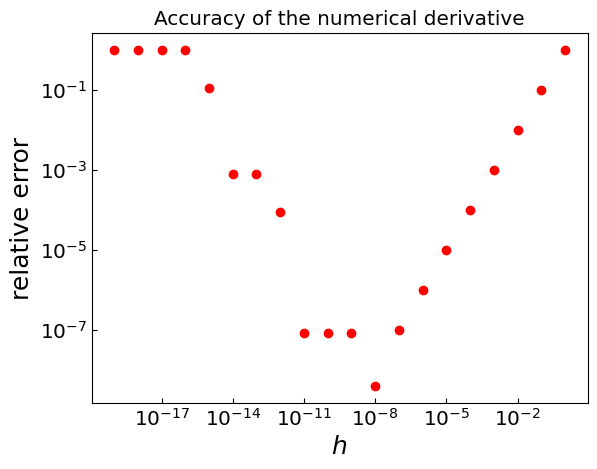

In [7]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the numerical derivative")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.scatter(arr_h, arr_err, color="red")

plt.show()